In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
from astropy.io import fits
from astropy.table import Table
import astropy.io.fits as pyfits

# Table of contents
1. [QUOTAS dataset](#QUOTAS)
    1. [Normal Distribution](#Norm)
    2. [Laplase  Distribution](#Lap)
    3. [Triangular Distribution](#Tri)
2. [QUAIA dataset](#QUAIA)
    1. [Normal Distribution](#Norm_qu)

# QUOTAS dataset <a name="QUOTAS"></a>

In [56]:
QN = pd.read_csv('QUOTAS_3only.csv')
QN = QN.dropna()
QN = QN[(QN.log_bh != 0) & (QN.log_lbol != -99.99) & 
                (QN.log_lbol != -99.999) & (QN['log_bh'].notna()) ].reset_index(drop=True)
QN=QN.drop(columns=['Unnamed: 0'])
QN_sort=QN.sort_values('z')
z = QN['z'].values
log_bh = QN['log_bh'].values
log_lbol = QN['log_lbol'].values

In [3]:
QN.to_csv('QN_nonan.csv',index=False)

# Normal dist <a name="Norm"></a>

In [65]:
meanbh, stdbh = np.mean(QN['log_bh']), np.std(QN['log_bh'])
meanbol, stdbol = np.mean(QN['log_lbol']), np.std(QN['log_lbol'])
meanz, stdz = np.mean(QN['z']), np.std(QN['z'])
#for normal dist
dftot = pd.DataFrame({
    'z': np.random.normal(loc=meanz, scale=stdz, size=len(QN)),
    'log_bh': np.random.normal(loc=meanbh, scale=stdbh, size=len(QN)),
    'log_lbol': np.random.normal(loc=meanbol, scale=stdbol, size=len(QN))})
data_norm = pd.DataFrame({
    'z': np.random.normal(loc=meanz, size=len(QN)),
    'log_bh': np.random.normal(loc=meanbh, size=len(QN)),
    'log_lbol': np.random.normal(loc=meanbol, size=len(QN))})

In [ ]:
samples = MCSamples(samples=QN.values, names=QN.columns.tolist(),label='QUOTAS')
samples1 = MCSamples(samples=data_norm.values, names=data_norm.columns.tolist(),label='Random normal with Mean')
samples2 = MCSamples(samples=dftot.values, names=dftot.columns.tolist(),label='Random normal with Var and Mean')

Removed no burn in
Removed no burn in
Removed no burn in


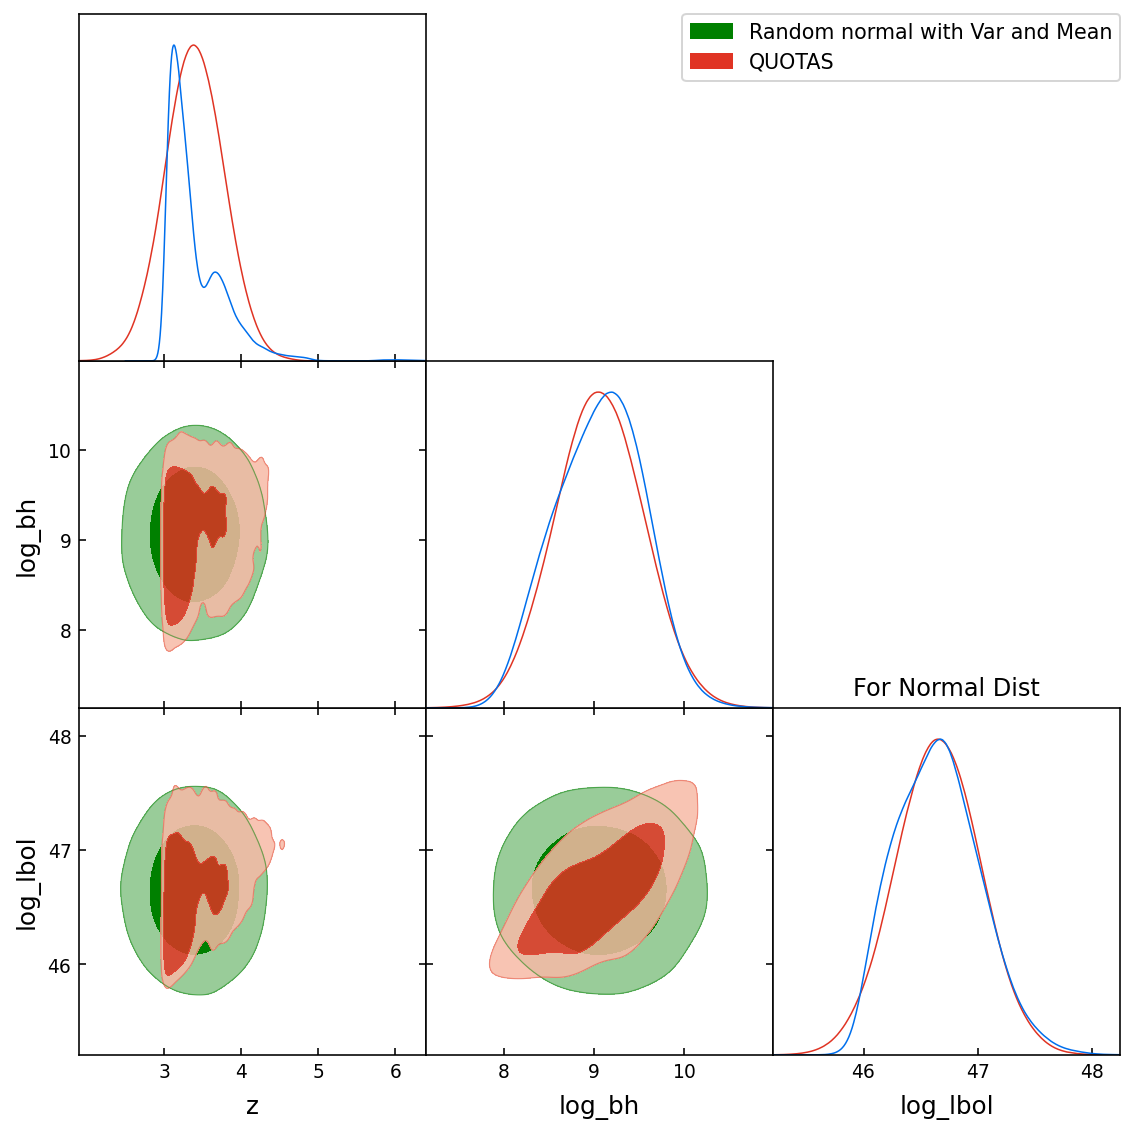

In [63]:
g = plots.get_subplot_plotter(width_inch=8)
g.triangle_plot([ samples2,samples], filled=True,
                colors=['green', ('#F7BAA6', '#E03424')])
plt.title('For Normal Dist')
plt.show()

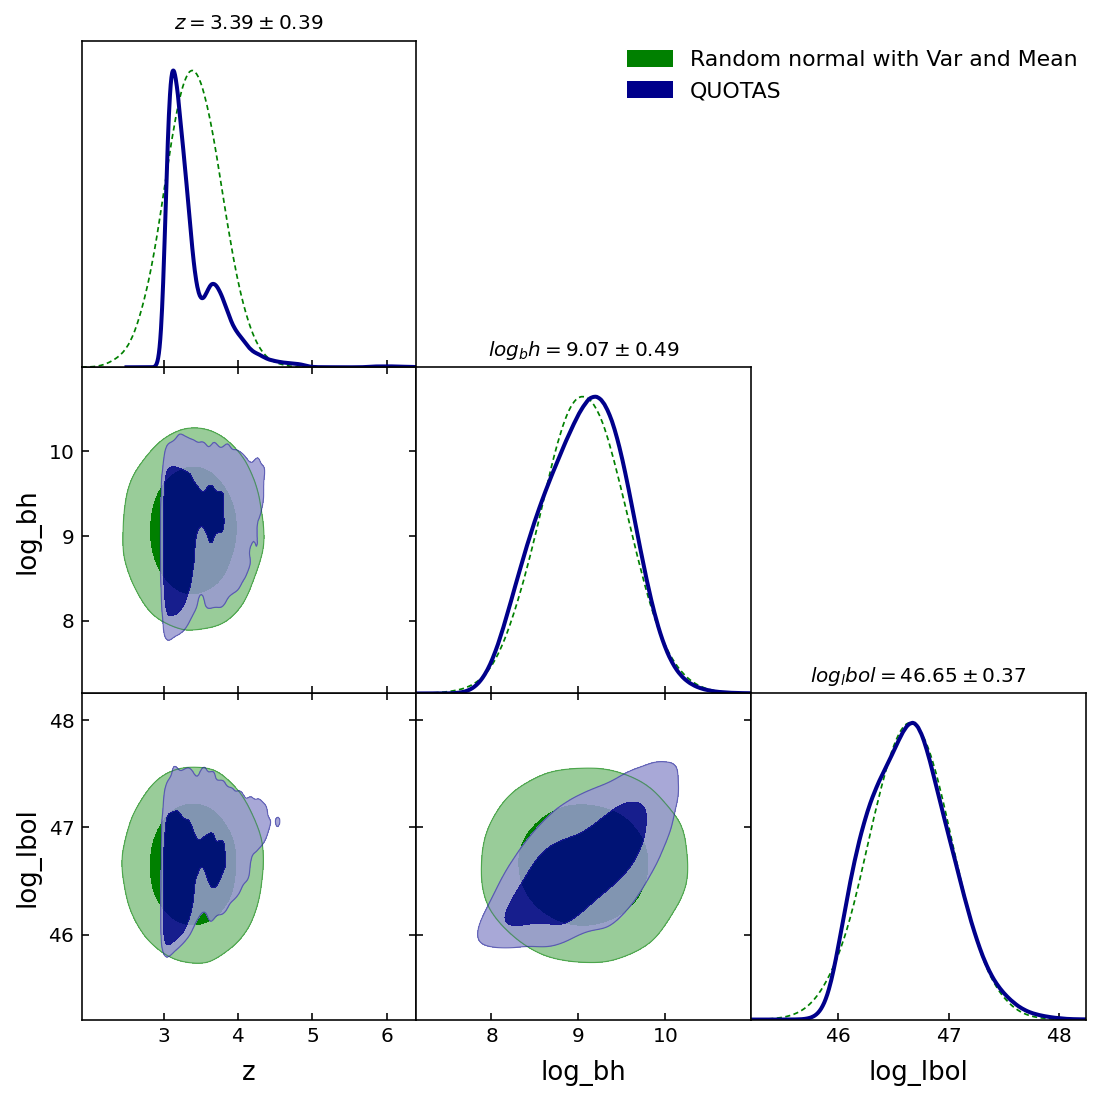

In [83]:
gfan = plots.get_subplot_plotter(width_inch=9)
gfan.settings.figure_legend_frame = False
# gfan.settings.alpha_filled_add=0.4
# gfan.settings.title_limit_fontsize = 14
gfan.triangle_plot([samples2, samples], ['z', 'log_bh', 'log_lbol'], 
    filled=True, 
    legend_labels=['Random normal with Var and Mean','QUOTAS'], 
    legend_loc='upper right', 
    line_args=[{'ls':'--', 'color':'green'},
               {'lw':2, 'color':'darkblue'}], 
    contour_colors=['green','darkblue'],
    title_limit=1, 
    markers={'log_lbol':0})

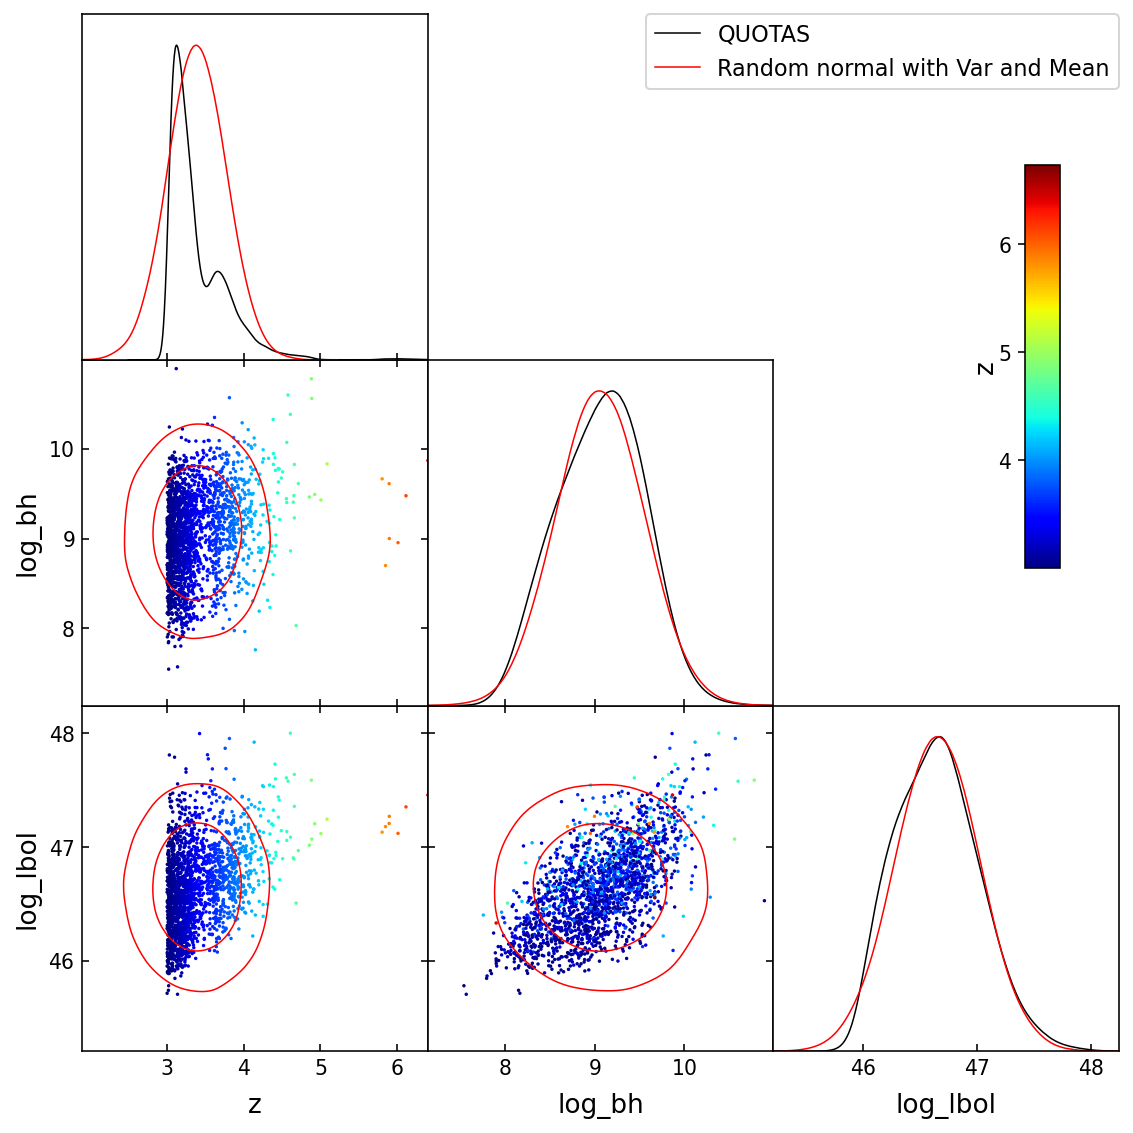

In [66]:
g_s = plots.get_subplot_plotter(width_inch=8)
g_s.settings.scaling_factor = 1
g_s.triangle_plot([samples, samples2], ['z', 'log_bh', 'log_lbol'], 
                plot_3d_with_param='z', legend_labels=['QUOTAS', 'Random normal with Var and Mean'])

# For Laplase Dist <a name="Lap"></a>

In [58]:
#for laplase dist
dflaplace = pd.DataFrame({
    'z': np.random.laplace(loc=np.max(z), size=len(QN)),
    'log_bh': np.random.laplace(loc=np.max(log_bh), size=len(QN)),
    'log_lbol': np.random.laplace(loc=np.max(log_lbol), size=len(QN))})
dflaplace

,z,log_bh,log_lbol
0,6.038603,10.344763,47.153217
1,7.520273,11.850203,49.036080
2,7.356230,11.156616,49.432254
3,8.223784,10.704648,47.676170
4,6.750512,11.989228,50.063678
...,...,...,...
34375,6.441339,8.595200,47.456235
34376,6.845559,11.125711,48.678383
34377,7.730626,9.098443,46.138481
34378,7.301032,8.447194,49.183243


Removed no burn in
Removed no burn in


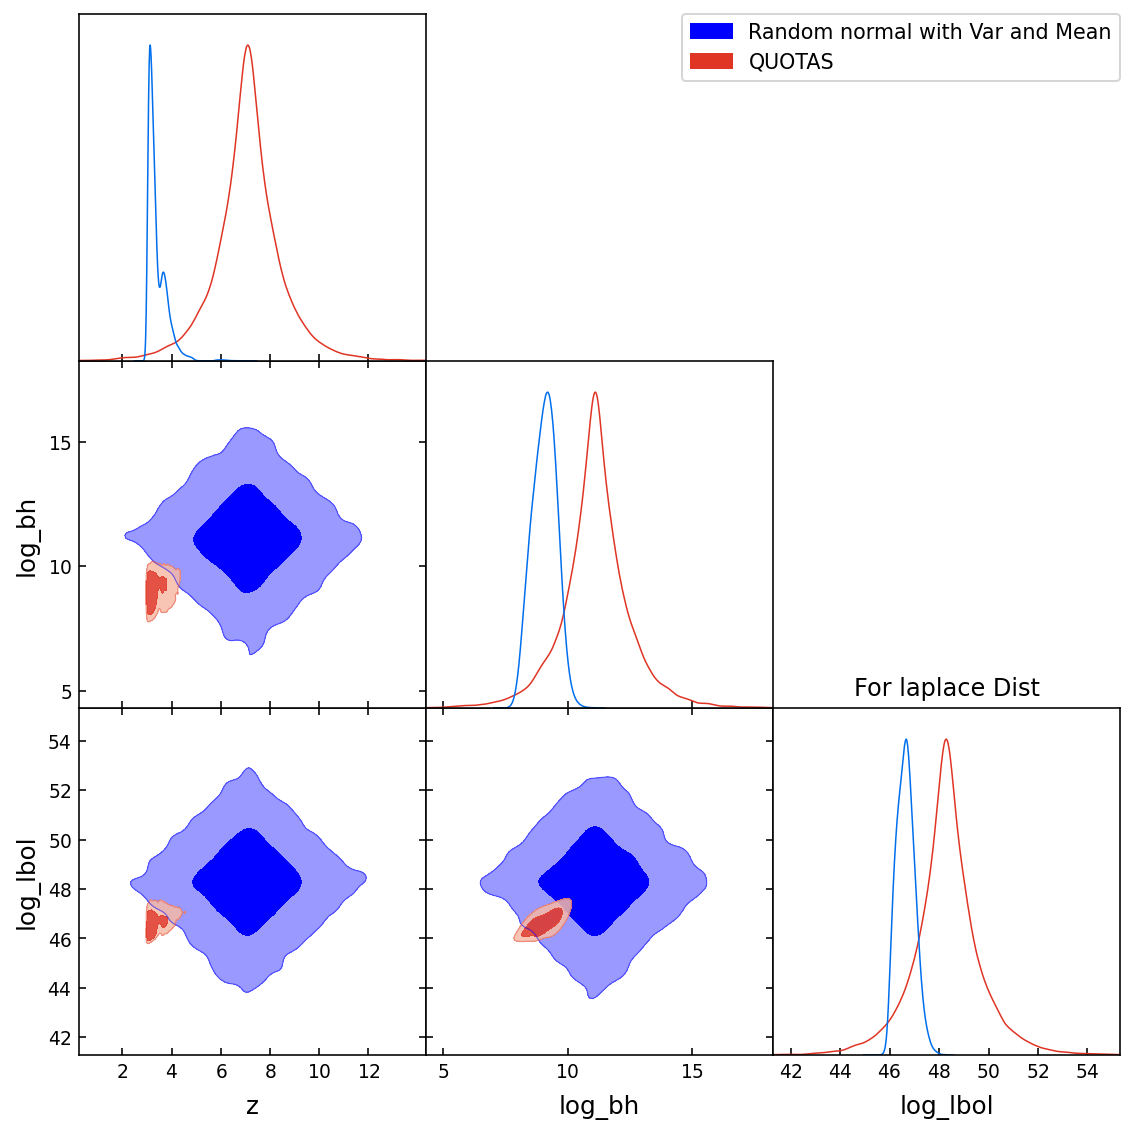

In [67]:
samples = MCSamples(samples=QN.values, names=QN.columns.tolist(),label='QUOTAS')
samples_lap = MCSamples(samples=dflaplace.values, names=dflaplace.columns.tolist(),label='Random normal with Var and Mean')

g_l = plots.get_subplot_plotter(width_inch=8)
g_l.triangle_plot([ samples_lap,samples], filled=True,
                colors=['b', ('#F7BAA6', '#E03424')],)
plt.title('For laplace Dist')
plt.show()

# For Triangular Dist: <a name="Tri"></a>

In [71]:
#for laplase dist
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html
dftriangular = pd.DataFrame({
    'z': np.random.triangular(left=np.min(z), mode=np.mean(z), right=np.max(z), size=len(QN)),
    'log_bh': np.random.triangular(left=np.min(log_bh), mode=np.mean(log_bh), right=np.max(log_bh), size=len(QN)),
    'log_lbol': np.random.triangular(left=np.min(log_lbol), mode=np.mean(log_lbol), right=np.max(log_lbol), size=len(QN))})
dftriangular

,z,log_bh,log_lbol
0,4.866762,9.210825,48.099804
1,4.429104,9.477337,47.507831
2,6.755881,8.842926,46.458063
3,3.315101,9.031172,46.817931
4,4.668772,9.575600,46.664553
...,...,...,...
34375,5.042402,7.641911,46.610037
34376,4.017807,10.444079,47.351548
34377,6.580177,9.137128,46.789083
34378,6.452725,10.171514,46.822555


Removed no burn in
Removed no burn in


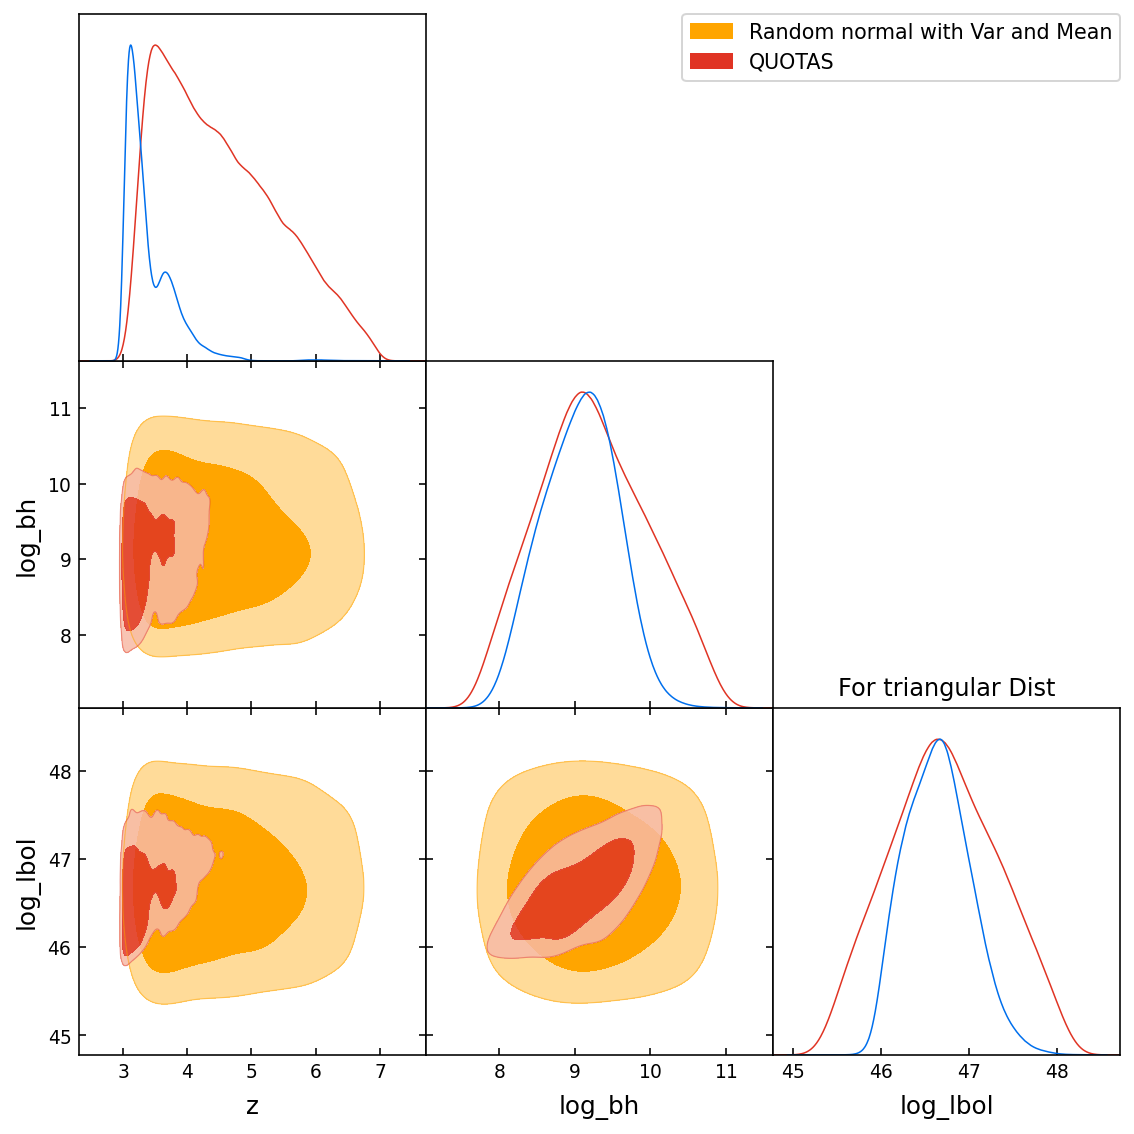

In [74]:
samples = MCSamples(samples=QN.values, names=QN.columns.tolist(),label='QUOTAS')
samples_tr = MCSamples(samples=dftriangular.values, names=dftriangular.columns.tolist(),label='Random normal with Var and Mean')

g_t = plots.get_subplot_plotter(width_inch=8)
g_t.triangle_plot([ samples_tr,samples], filled=True,
                colors=['orange', ('#F7BAA6', '#E03424')],)
plt.title('For triangular Dist')
plt.show()

----

# QUAIA datas <a name="QUAIA"></a>

## quaia_G20.0

In [9]:
QUAIA = fits.open('quaia_G20.0.fits')[1].data
QUAIA.columns

ColDefs(
    name = 'source_id'; format = 'K'; null = 999999
    name = 'unwise_objid'; format = '16A'
    name = 'redshift_quaia'; format = 'D'
    name = 'redshift_quaia_err'; format = 'D'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'l'; format = 'D'; unit = 'deg'
    name = 'b'; format = 'D'; unit = 'deg'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'phot_bp_mean_mag'; format = 'E'; unit = 'mag'
    name = 'phot_rp_mean_mag'; format = 'E'; unit = 'mag'
    name = 'mag_w1_vg'; format = 'D'; unit = 'mag'
    name = 'mag_w2_vg'; format = 'D'; unit = 'mag'
    name = 'pm'; format = 'D'; unit = 'mas yr-1'
    name = 'pmra'; format = 'D'; unit = 'mas yr-1'
    name = 'pmdec'; format = 'D'; unit = 'mas yr-1'
    name = 'pmra_error'; format = 'E'; unit = 'mas yr-1'
    name = 'pmdec_error'; format = 'E'; unit = 'mas yr-1'
)

In [22]:
z_q = QUAIA['redshift_quaia']
G_mean_q = QUAIA['phot_g_mean_mag']
bp_mean_q = QUAIA['phot_bp_mean_mag']
rp_mean_q = QUAIA['phot_rp_mean_mag']
w1_q = QUAIA['mag_w1_vg']
w2_q = QUAIA['mag_w2_vg']
qu_df = pd.DataFrame({'z':z_q,'g_{mean}':G_mean_q,'bp':bp_mean_q,'rp':rp_mean_q,'w1':w1_q,'w2':w2_q})
# qu_df = qu_df.drop_duplicates()
# qu_df = qu_df.dropna()
qu_df

,z,g_{mean},bp,rp,w1,w2
0,1.736468,18.787239,19.080688,18.240915,15.219950,13.868094
1,1.513049,18.888464,19.171280,18.509371,15.317786,14.013617
2,2.852854,19.218422,19.486340,18.814501,16.027142,15.041919
3,1.723440,19.837416,20.162195,19.387741,16.148400,14.913529
4,0.803480,18.863981,19.050497,18.467363,14.405685,13.324464
...,...,...,...,...,...,...
755845,2.849235,19.090134,19.399574,18.695288,16.184520,15.095135
755846,2.110545,18.545496,18.741863,18.104944,15.349310,14.060057
755847,1.516199,19.289822,19.527134,18.871420,15.792717,14.441874
755848,0.437555,19.866022,19.880123,18.940584,15.015039,14.325315


## quaia_G20.5

In [7]:
dat2 = fits.open('quaia_G20.5.fits')[1].data
len(dat2)

1295502

In [26]:
z_q_2 = dat2['redshift_quaia']
G_mean_q_2 = dat2['phot_g_mean_mag']
bp_mean_q_2 = dat2['phot_bp_mean_mag']
rp_mean_q_2 = dat2['phot_rp_mean_mag']
w1_q_2 = dat2['mag_w1_vg']
w2_q_2 = dat2['mag_w2_vg']
qu_df_2 = pd.DataFrame({'z':z_q_2,'g_{mean}':G_mean_q_2,'bp':bp_mean_q_2,'rp':rp_mean_q_2,'w1':w1_q_2,'w2':w2_q_2})
# qu_df = qu_df.drop_duplicates()
# qu_df = qu_df.dropna()
qu_df_2

,z,g_{mean},bp,rp,w1,w2
0,0.416867,20.173105,20.200150,18.871586,14.774343,13.923867
1,1.736468,18.787239,19.080688,18.240915,15.219950,13.868094
2,1.513049,18.888464,19.171280,18.509371,15.317786,14.013617
3,2.422632,20.330523,20.320410,19.841410,17.273508,16.396996
4,2.852854,19.218422,19.486340,18.814501,16.027142,15.041919
...,...,...,...,...,...,...
1295497,2.110545,18.545496,18.741863,18.104944,15.349310,14.060057
1295498,1.516199,19.289822,19.527134,18.871420,15.792717,14.441874
1295499,0.437555,19.866022,19.880123,18.940584,15.015039,14.325315
1295500,3.050985,20.199286,20.456455,19.743429,17.034359,16.383333


In [23]:
qu_df.to_csv('qu_df.csv',index=False)

In [24]:
qu_df = pd.read_csv('qu_df.csv')
qu_df = qu_df.dropna()
qu_df = qu_df.drop_duplicates()
qu_df

,z,g_{mean},bp,rp,w1,w2
0,1.736468,18.787240,19.080688,18.240915,15.219950,13.868094
1,1.513049,18.888464,19.171280,18.509370,15.317786,14.013617
2,2.852854,19.218422,19.486340,18.814500,16.027142,15.041919
3,1.723440,19.837416,20.162195,19.387741,16.148400,14.913529
4,0.803480,18.863981,19.050497,18.467363,14.405685,13.324464
...,...,...,...,...,...,...
755845,2.849235,19.090134,19.399574,18.695288,16.184520,15.095135
755846,2.110545,18.545496,18.741863,18.104944,15.349310,14.060057
755847,1.516199,19.289822,19.527134,18.871420,15.792717,14.441874
755848,0.437555,19.866022,19.880123,18.940584,15.015039,14.325315


## Total

In [33]:
qu_tot = pd.concat([qu_df_2,qu_df]).reset_index(drop=True)
qu_tot = qu_tot.dropna().drop_duplicates()
qu_tot

,z,g_{mean},bp,rp,w1,w2
0,0.416867,20.173105,20.200150,18.871586,14.774343,13.923867
1,1.736468,18.787239,19.080688,18.240915,15.219950,13.868094
2,1.513049,18.888464,19.171280,18.509371,15.317786,14.013617
3,2.422632,20.330523,20.320410,19.841410,17.273508,16.396996
4,2.852854,19.218422,19.486340,18.814501,16.027142,15.041919
...,...,...,...,...,...,...
2051347,2.849235,19.090134,19.399574,18.695288,16.184520,15.095135
2051348,2.110545,18.545496,18.741863,18.104944,15.349310,14.060057
2051349,1.516199,19.289822,19.527134,18.871420,15.792717,14.441874
2051350,0.437555,19.866022,19.880123,18.940584,15.015039,14.325315


In [34]:
means_tot = qu_tot.mean()
stds_tot = qu_tot.std()

dftot_quaia_tot = pd.DataFrame({
    col: np.random.normal(loc=means_tot[col], scale=stds_tot[col], size=len(qu_tot))
    for col in qu_tot.columns})

data_norm_quaia_tot = pd.DataFrame({
    col: np.random.normal(loc=means_tot[col], size=len(qu_tot))
    for col in qu_tot.columns})

In [35]:
samples_qu_tot = MCSamples(samples=qu_tot.values, names=qu_tot.columns.tolist(),label='QUAIA')
samples2_qu_tot = MCSamples(samples=dftot_quaia_tot.values, 
                        names=dftot_quaia_tot.columns.tolist(),label='Random normal with Var and Mean')

Removed no burn in
Removed no burn in


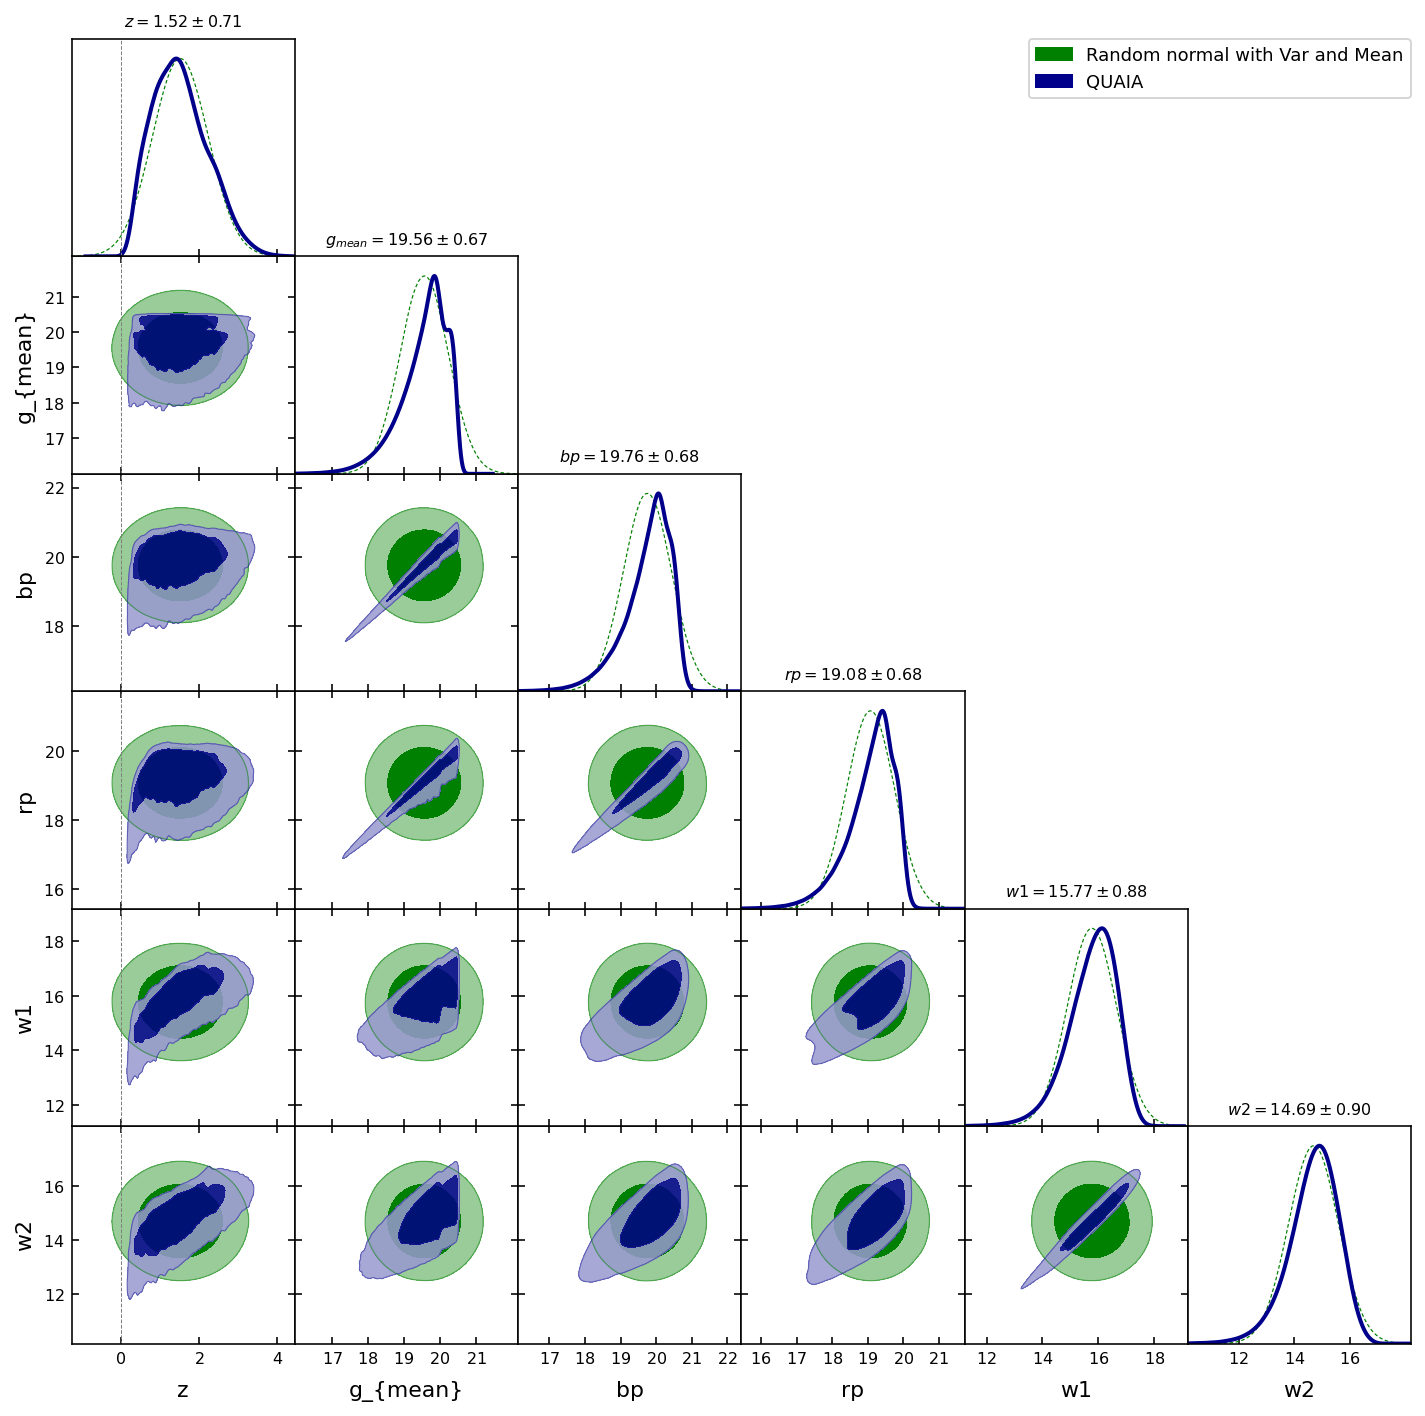

In [36]:
g_quaia_norm_tot = plots.get_subplot_plotter(width_inch=12)
g_quaia_norm_tot.triangle_plot([ samples2_qu_tot,samples_qu_tot], filled=True,
                legend_labels=['Random normal with Var and Mean','QUAIA'],
                legend_loc='upper right', 
                line_args=[{'ls':'--', 'color':'green'},
               {'lw':2, 'color':'darkblue'}],    
                contour_colors=['green','darkblue'],
                title_limit=1, 
                markers={'z':0})
plt.show()

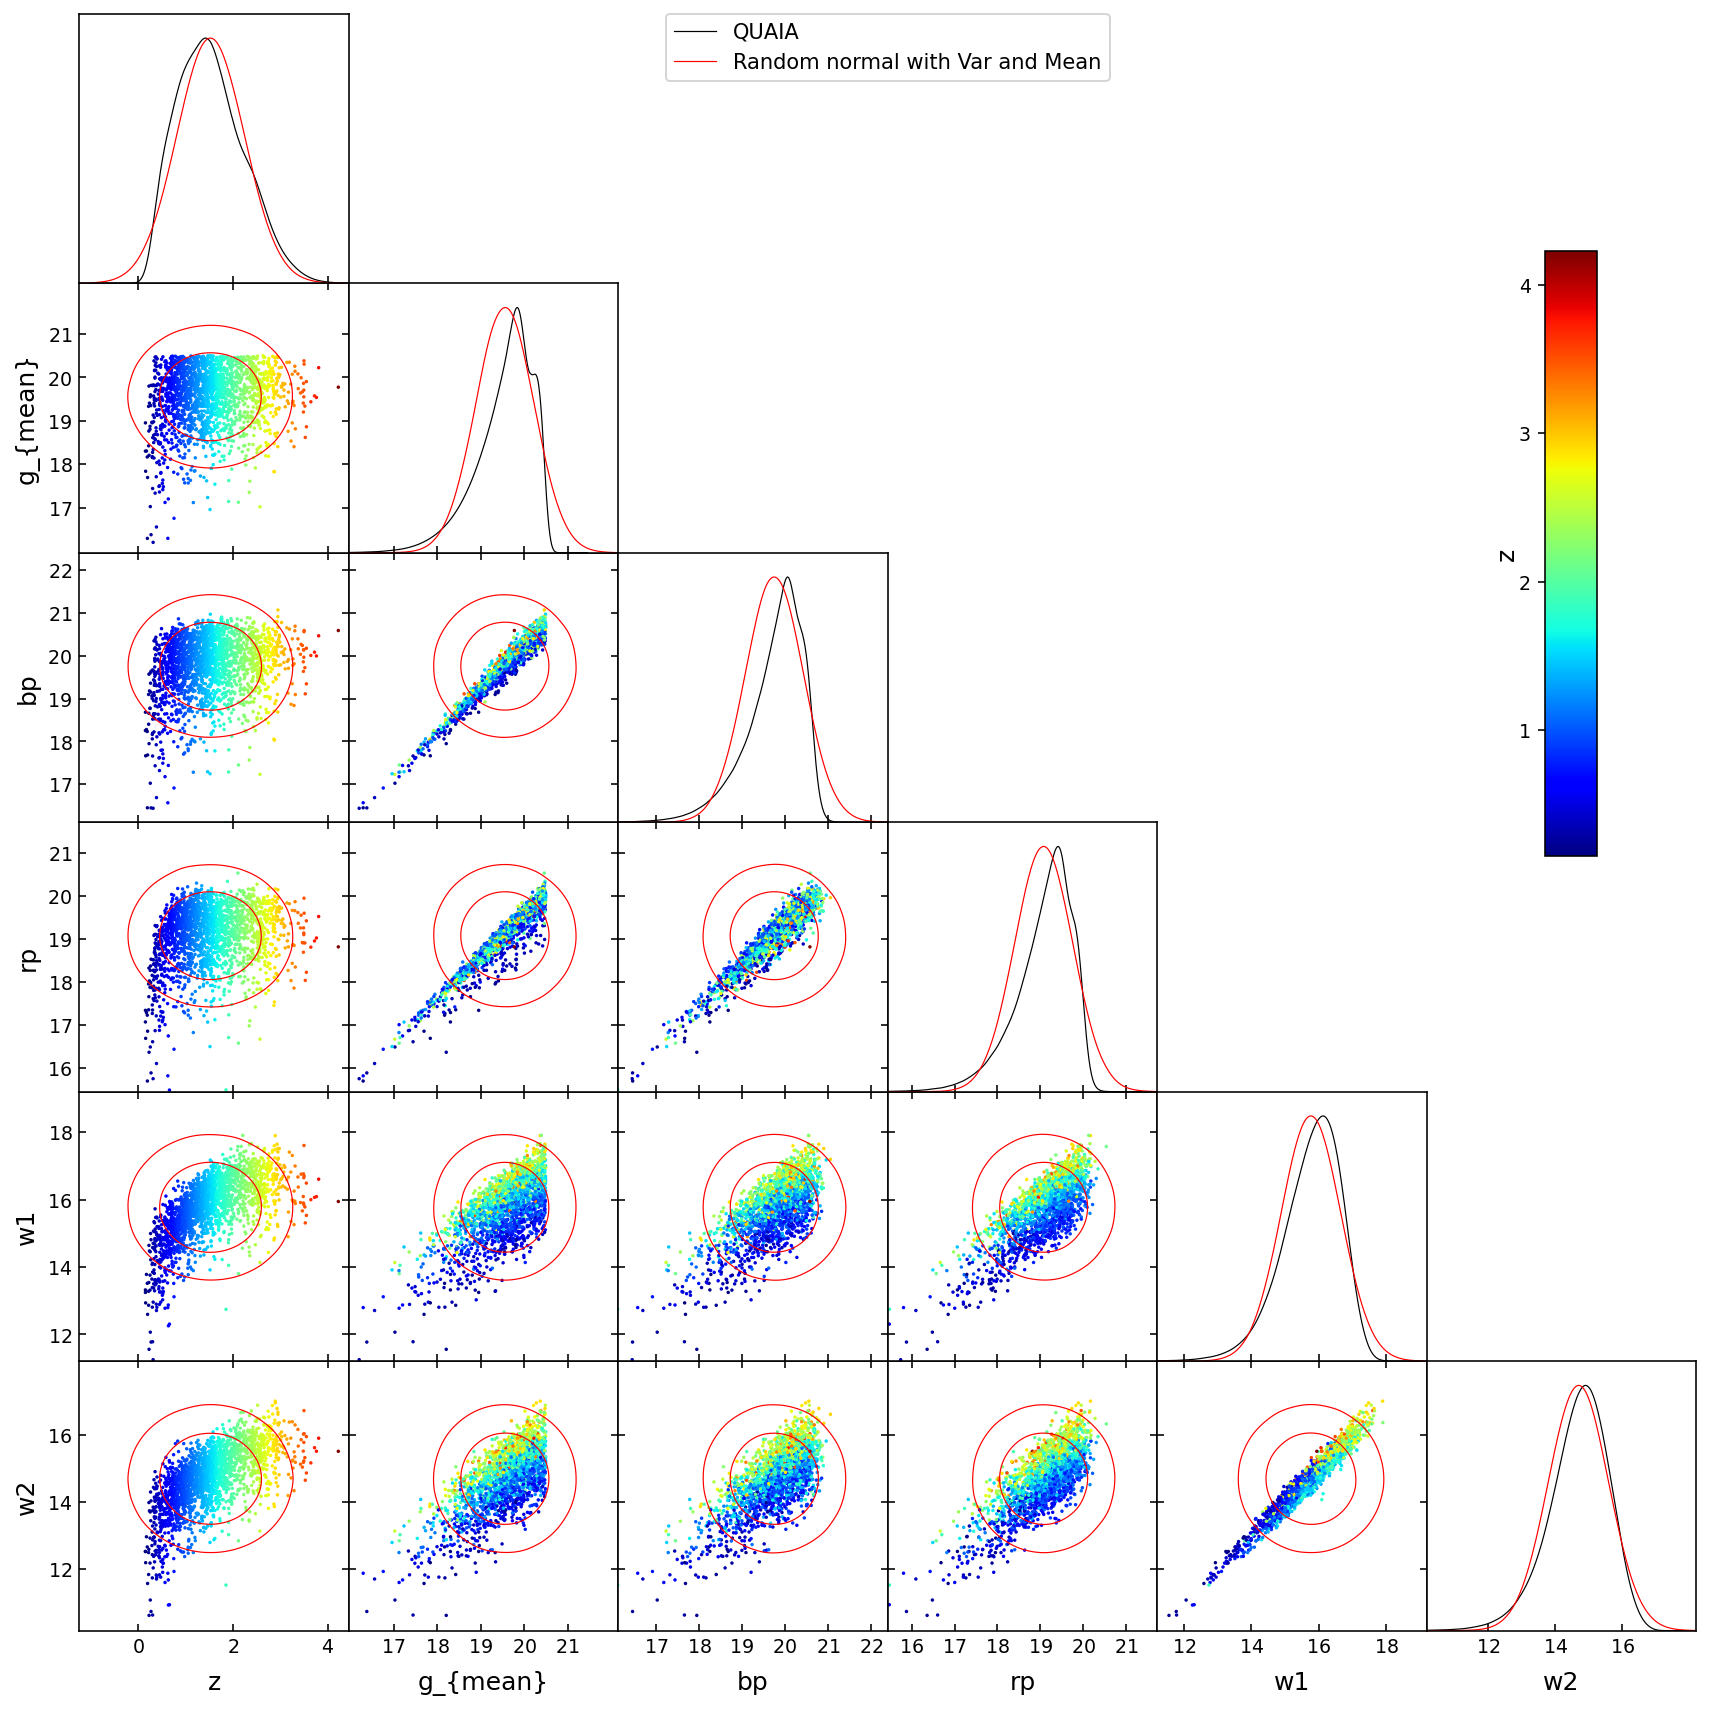

In [37]:
g_s_qu_tot = plots.get_subplot_plotter(width_inch=12)
g_s_qu_tot.settings.scaling_factor = 1
g_s_qu_tot.triangle_plot([samples_qu_tot, samples2_qu_tot], ['z','g_{mean}','bp','rp','w1','w2'],
                plot_3d_with_param='z', legend_labels=['QUAIA', 'Random normal with Var and Mean'])

# For Normal Distribution <a name="Norm_qu"></a>

In [76]:
means = qu_df.mean()
stds = qu_df.std()

dftot_quaia = pd.DataFrame({
    col: np.random.normal(loc=means[col], scale=stds[col], size=len(qu_df))
    for col in qu_df.columns})

data_norm_quaia = pd.DataFrame({
    col: np.random.normal(loc=means[col], size=len(qu_df))
    for col in qu_df.columns})

In [77]:
samples_qu = MCSamples(samples=qu_df.values, names=qu_df.columns.tolist(),label='QUAIA')
samples1_qu = MCSamples(samples=data_norm_quaia.values, names=data_norm_quaia.columns.tolist(),label='Random normal with Mean')
samples2_qu = MCSamples(samples=dftot_quaia.values, names=dftot_quaia.columns.tolist(),label='Random normal with Var and Mean')

Removed no burn in
Removed no burn in
Removed no burn in


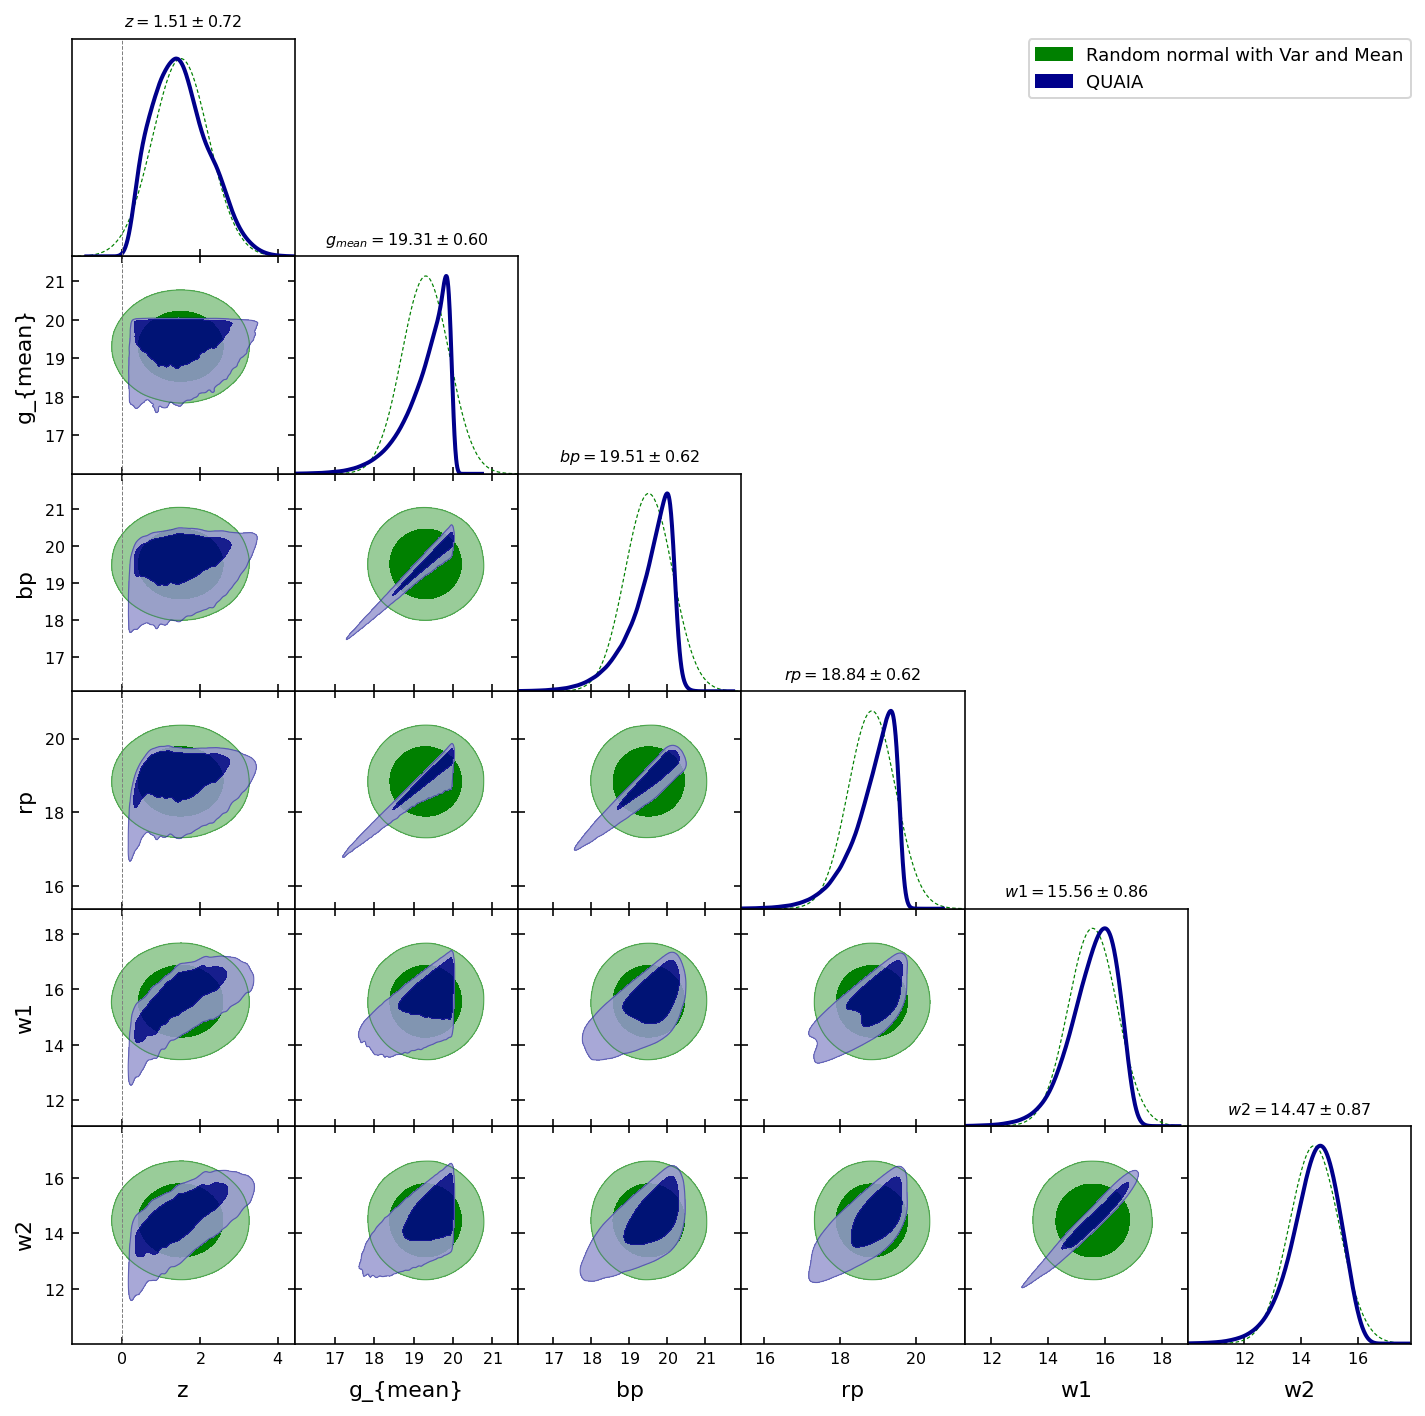

In [78]:
g_quaia_norm = plots.get_subplot_plotter(width_inch=12)
g_quaia_norm.triangle_plot([ samples2_qu,samples_qu], filled=True,
                legend_labels=['Random normal with Var and Mean','QUAIA'],
                legend_loc='upper right', 
                line_args=[{'ls':'--', 'color':'green'},
               {'lw':2, 'color':'darkblue'}],    
                contour_colors=['green','darkblue'],
                title_limit=1, 
                markers={'z':0})
# plt.title('For Normal Dist')
plt.show()

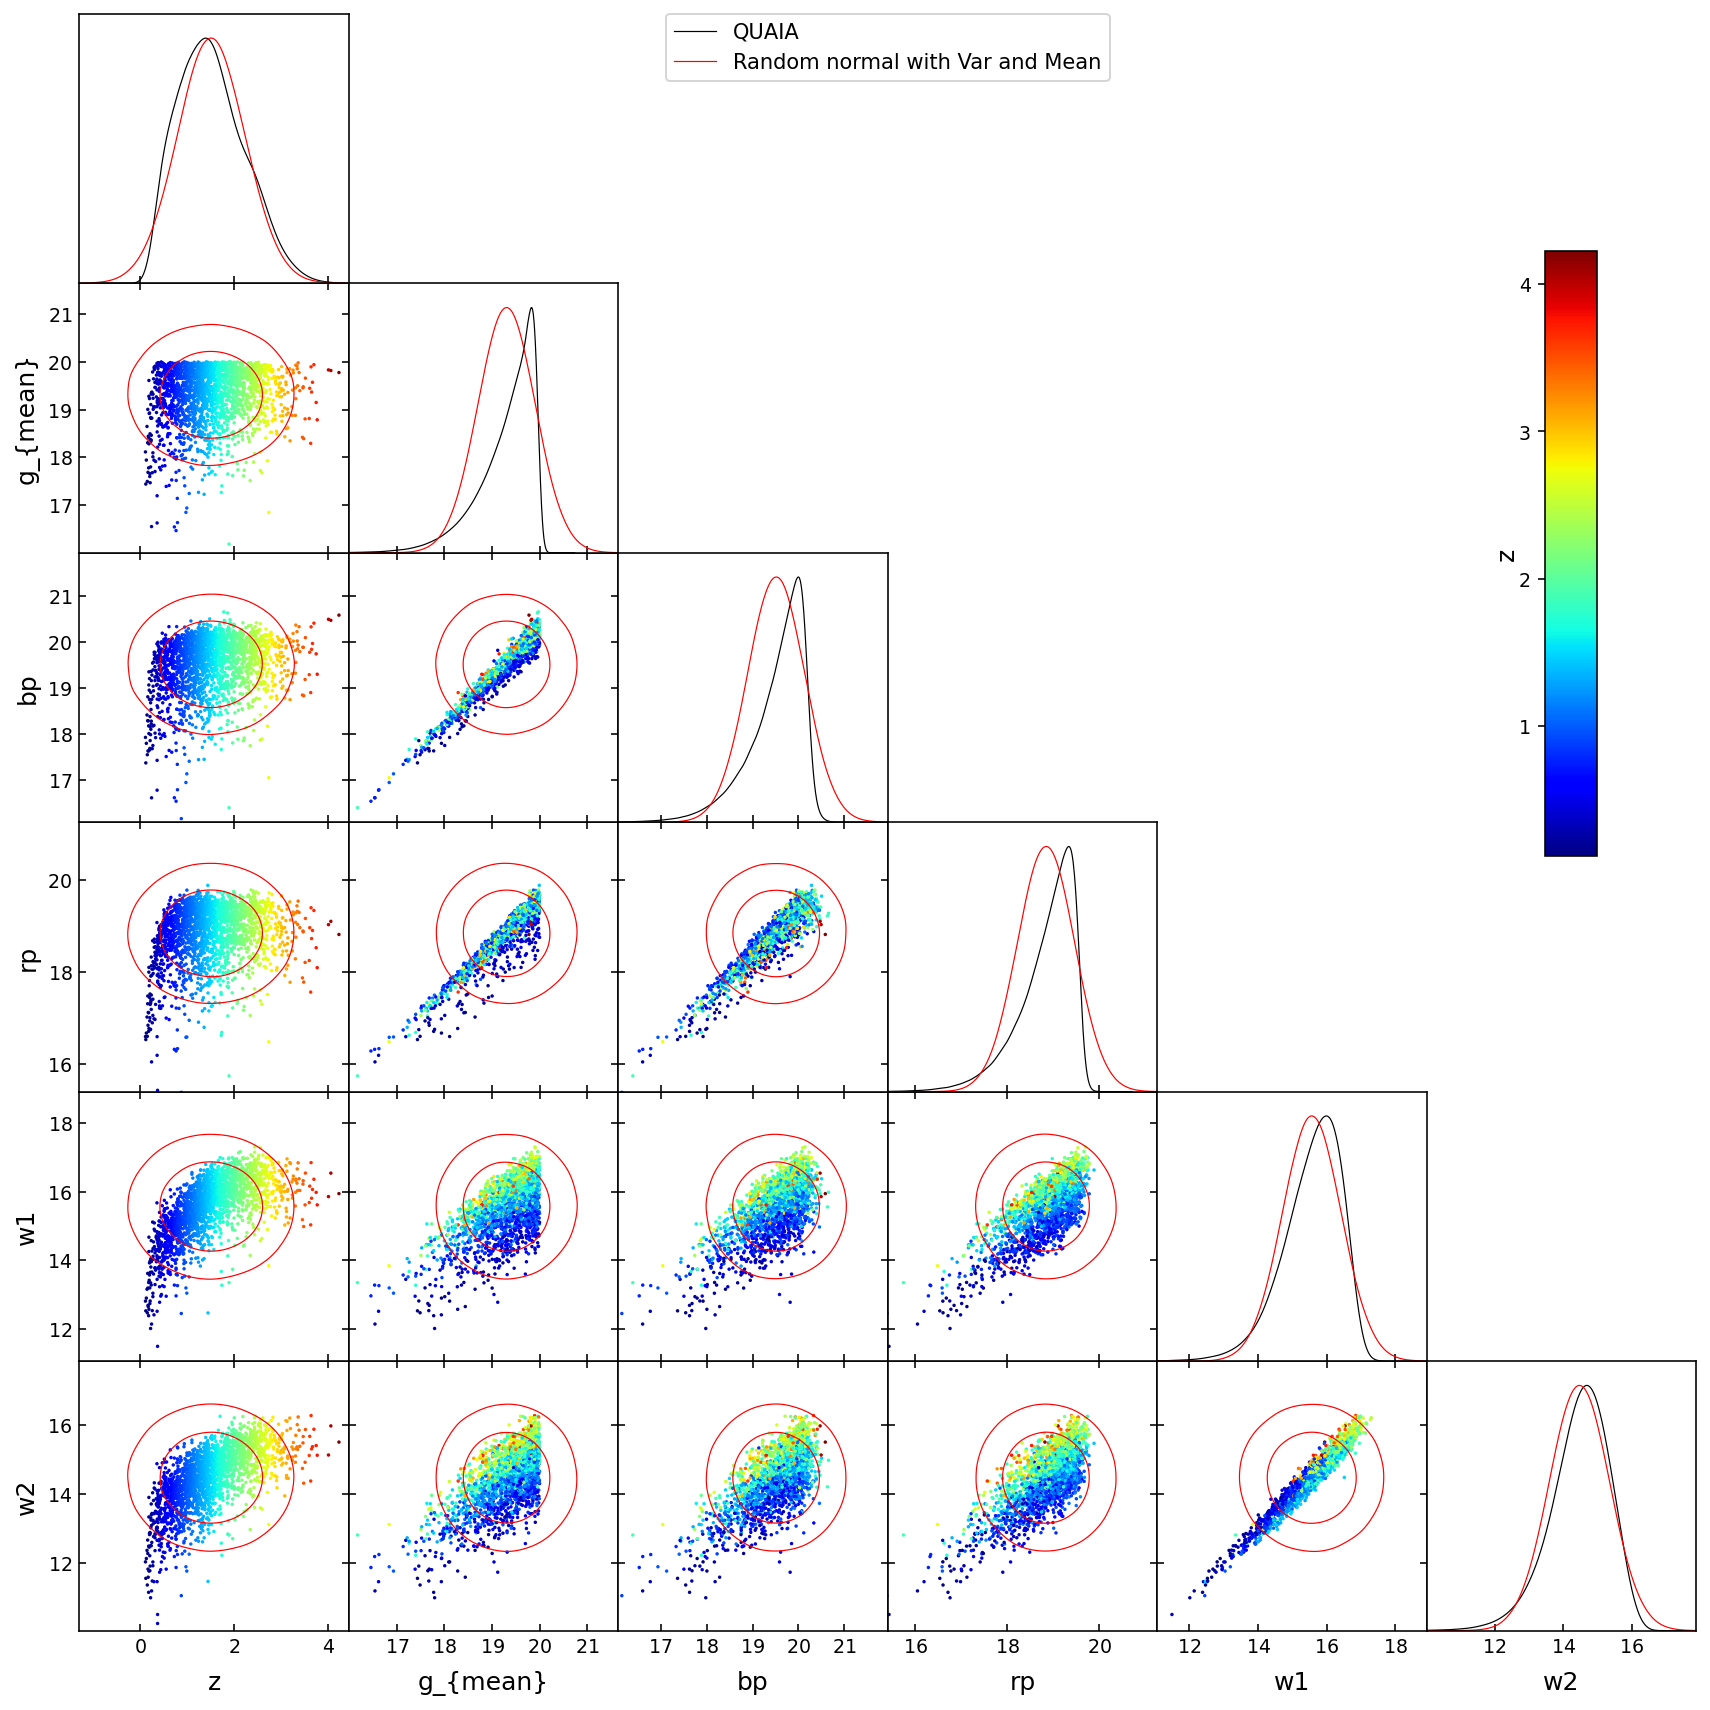

In [64]:
g_s_qu = plots.get_subplot_plotter(width_inch=12)
g_s_qu.settings.scaling_factor = 1
g_s_qu.triangle_plot([samples_qu, samples2_qu], ['z','g_{mean}','bp','rp','w1','w2'],
                plot_3d_with_param='z', legend_labels=['QUAIA', 'Random normal with Var and Mean'])

---

<ipython-input-66-5fa3066d0ae2>:6: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*(B*x**2))
<ipython-input-66-5fa3066d0ae2>:6: RuntimeWarning: overflow encountered in multiply
  y = A*np.exp(-1*(B*x**2))


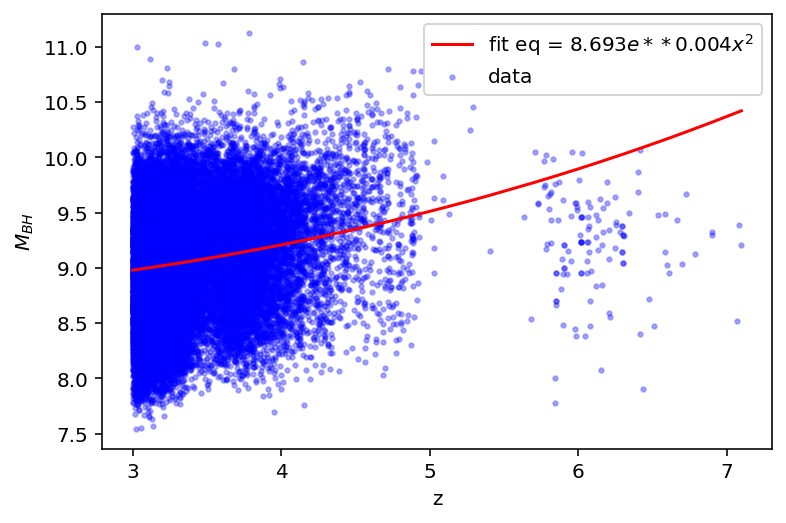

<ipython-input-66-5fa3066d0ae2>:6: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*(B*x**2))
<ipython-input-66-5fa3066d0ae2>:6: RuntimeWarning: overflow encountered in multiply
  y = A*np.exp(-1*(B*x**2))


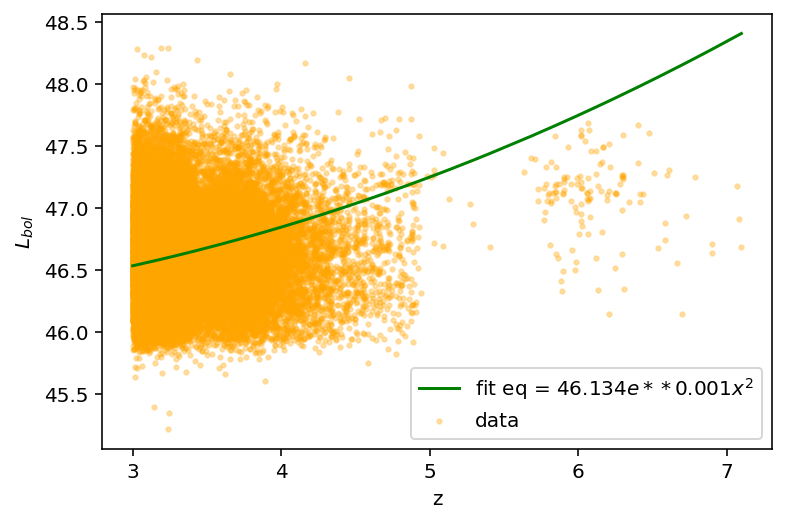

In [66]:
from scipy.optimize import curve_fit 
xdata = np.asarray(QN_sort['z']) 
ydata = np.asarray(QN_sort['log_bh']) 
zdata = np.asarray(QN_sort['log_lbol']) 
def Gauss(x, A, B): 
    y = A*np.exp(-1*(B*x**2))
    return y 

parameters, covariance = curve_fit(Gauss, xdata, ydata) 
fit_A = parameters[0] 
fit_B = parameters[1] 
fit_y = Gauss(xdata, fit_A, fit_B) 
plt.scatter(z,log_bh,s=5,c='b',alpha=0.3,label='data')
plt.plot(xdata, fit_y, '-',c='r', label='fit eq = {}$e ** {}x^2$'.format(round(fit_A,3),round(-fit_B,3))) 
plt.legend()
plt.xlabel('z')
plt.ylabel('$M_{BH}$')
plt.show()


parameters_L, covariance_L = curve_fit(Gauss, xdata, zdata) 
fit_A_L = parameters_L[0] 
fit_B_L = parameters_L[1] 
fit_z = Gauss(xdata, fit_A_L, fit_B_L) 
plt.scatter(z,zdata,s=5,c='orange',alpha=0.3,label='data')
plt.plot(xdata, fit_z, '-',c='g', label='fit eq = {}$e ** {}x^2$'.format(round(fit_A_L,3),round(-fit_B_L,3))) 
plt.xlabel('z')
plt.ylabel('$L_{bol}$')
plt.legend()
plt.show()


In [61]:
print('Mean of M_{BH} Vs. z is: ',np.mean(fit_y),'\n STD of M_{BH} Vs. z is: ',np.std(fit_y))
print('Mean of L_{bol} Vs. z is: ',np.mean(fit_z),'\n STD of L_{bol} Vs. z is: ',np.std(fit_z))

Mean of M_{BH} Vs. z is:  9.066119725623064 
 STD of M_{BH} Vs. z is:  0.10014913687424183
Mean of L_{bol} Vs. z is:  46.64981304886861 
 STD of L_{bol} Vs. z is:  0.13471120078290533


In [65]:
(parameters),(parameters_L),covariance,covariance_L

(array([ 8.69321143e+00, -3.59707750e-03]),
 array([ 4.61336556e+01, -9.53849921e-04]),
 array([[9.33365280e-05, 8.54531320e-07],
        [8.54531320e-07, 8.38152431e-09]]),
 array([[5.40176899e-05, 9.38933236e-08],
        [9.38933236e-08, 1.74285404e-10]]))

---

In [81]:
ndim = 4
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
A = random_state.random((ndim,ndim))
cov = np.dot(A, A.T)
samps = random_state.multivariate_normal([0]*ndim, cov, size=nsamp)
A = random_state.random((ndim,ndim))
cov = np.dot(A, A.T)
samps2 = random_state.multivariate_normal([0]*ndim, cov, size=nsamp)

In [83]:
cov

array([[1.47702924, 1.61283611, 0.52920644, 1.03750575],
       [1.61283611, 2.05601747, 0.65951003, 0.89602049],
       [0.52920644, 0.65951003, 0.31490907, 0.33961306],
       [1.03750575, 0.89602049, 0.33961306, 1.10053252]])

In [85]:
A

array([[0.16141968, 0.53763698, 0.87379434, 0.63119161],
       [0.33639586, 0.16611113, 0.9645484 , 0.9924257 ],
       [0.00440337, 0.18303264, 0.11875346, 0.51699744],
       [0.32282348, 0.87591689, 0.40794178, 0.25034103]])

In [3]:
names = ["x%s"%i for i in range(ndim)]
labels =  ["x_%s"%i for i in range(ndim)]
samples = MCSamples(samples=samps,names = names, labels = labels)
samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')

Removed no burn in
Removed no burn in


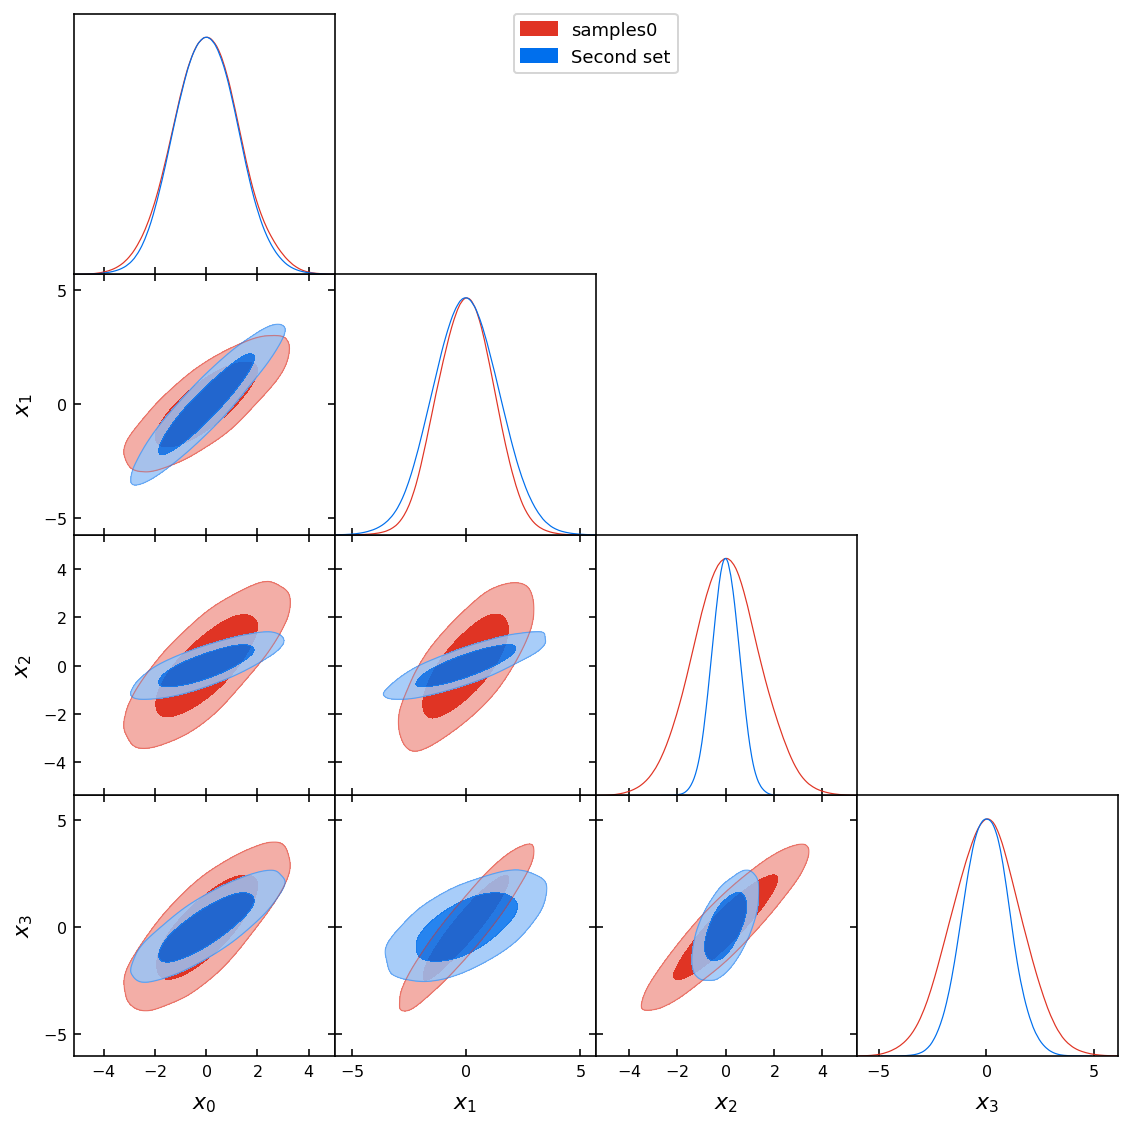

In [4]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples, samples2], filled=True)

In [3]:
import pandas as pd

# Load data from .csv file
data = pd.read_csv('QUOTAS.csv')

# Calculate covariance matrix
cov_matrix = data.cov()

# Save covariance matrix to a file
cov_matrix.to_csv('cov_matrix.txt', sep=' ', header=False, index=False)

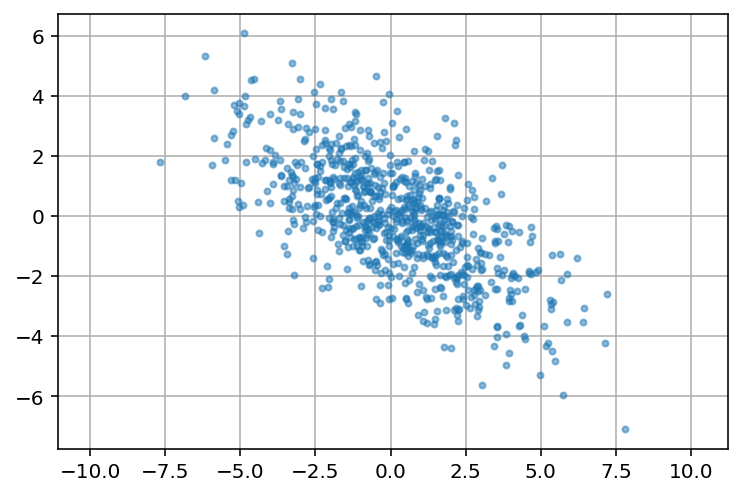

In [10]:
cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([0, 0], cov, size=800)
plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

In [25]:
meanbh=np.mean(QN['log_bh']);stdbh=np.std(QN['log_bh']);
meanbol=np.mean(QN['log_lbol']);stdbol=np.std(QN['log_lbol']);
meanz=np.mean(QN['z']);stdz=np.std(QN['z']);

In [27]:
databh = np.random.normal(loc=meanbh,scale=stdbh,size=len(QN))
databhpois=np.random.poisson(loc=meanbh,scale=stdbh,size=len(QN))
dfbh = pd.DataFrame(databh, columns=['log_bh'])
dfbh.to_csv('gaussian_data_std_bh.csv', index=False)

datalbol = np.random.normal(loc=meanbol,scale=stdbol,size=len(QN))
dflbol = pd.DataFrame(datalbol, columns=['log_lbol'])
dflbol.to_csv('gaussian_data_std_lbol.csv', index=False)

dataz = np.random.normal(loc=meanz,scale=stdz,size=len(QN))
dfz = pd.DataFrame(dataz, columns=['z'])
dfz.to_csv('gaussian_data_std_z.csv', index=False)

In [21]:
data_norm = pd.read_csv('gaussian_tot.csv')
data_norm

,z,log_bh,log_lbol
0,2.917927,9.404018,46.806241
1,3.834337,9.566677,45.635034
2,3.017320,9.282917,46.333320
3,2.776214,8.987364,46.578398
4,2.707819,8.848480,47.966617
...,...,...,...
34375,2.643213,10.931991,47.354671
34376,4.172700,8.631808,48.183015
34377,4.853333,9.895911,46.565406
34378,2.946538,6.778269,45.850426


In [38]:
dftot1=pd.concat([dfz,dfbh,dflbol,],axis=1,ignore_index=True).values
dftot=pd.DataFrame(dftot1, columns=['z', 'log_bh', 'log_lbol'])
dftot

,z,log_bh,log_lbol
0,2.409802,8.805696,46.103849
1,2.767345,8.717523,46.284171
2,2.844977,9.385561,47.463551
3,4.126397,8.852477,46.896116
4,2.646773,9.376957,46.059328
...,...,...,...
34375,2.835133,8.287835,46.016691
34376,3.900115,9.354073,47.155049
34377,3.393396,9.203671,47.042598
34378,3.681131,9.033503,46.439248
